In [22]:
import pandas as pd
import numpy as np

import scipy.stats as stats

# load data
df = pd.read_excel("D:\\Data science\\assignments\\EastWestAirlines.xlsx",sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [23]:
# 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.

# Check for missing values
df.isnull().sum()
print(df.isnull().sum())


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [25]:
# 2. Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.

# Calculate descriptive statistics
df.describe()




,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [26]:
# finding correlation
df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


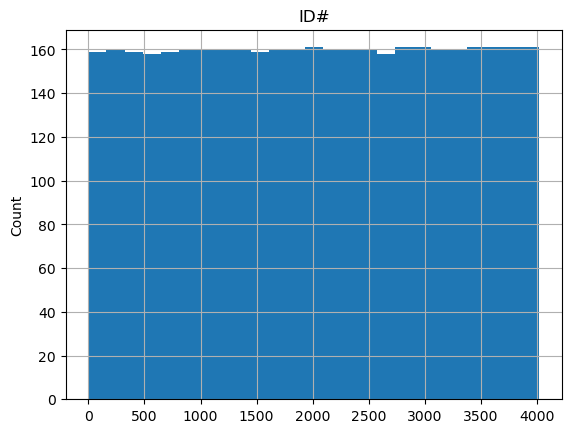

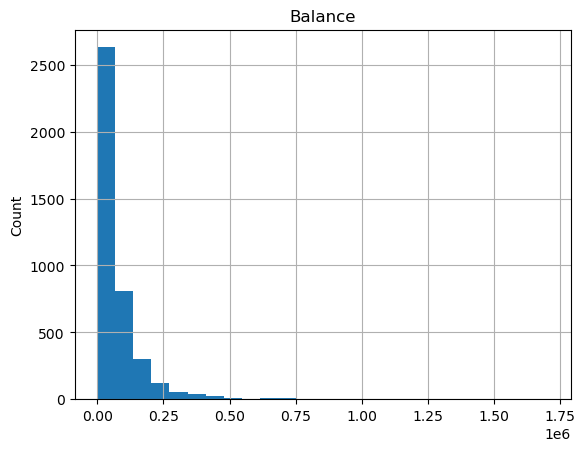

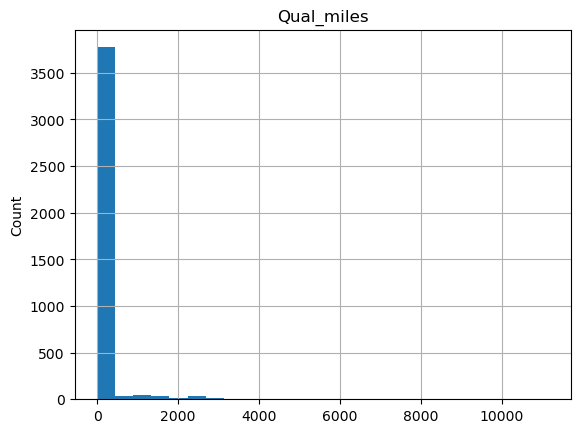

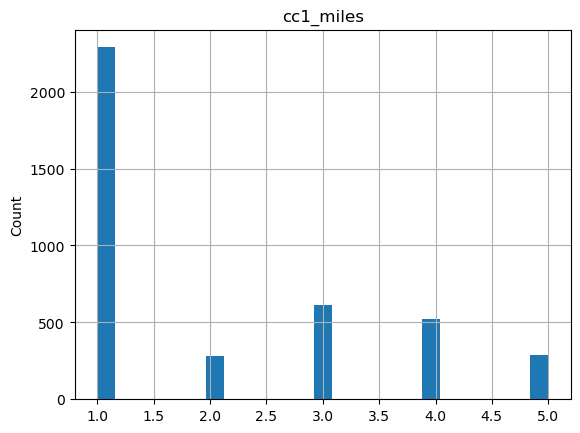

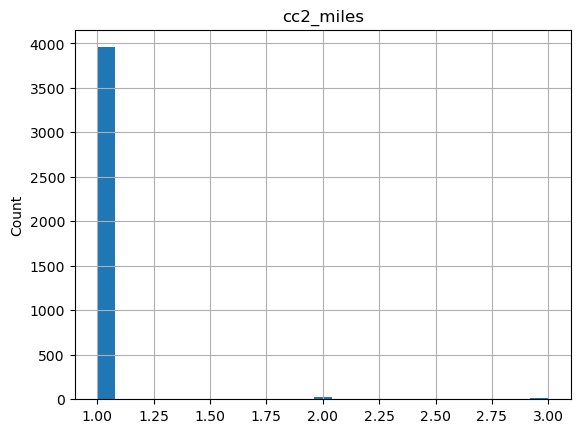

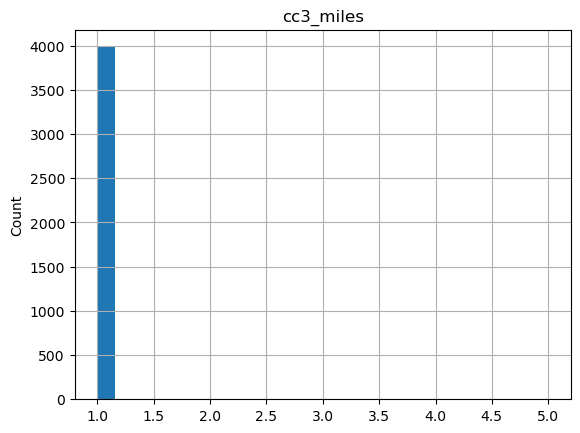

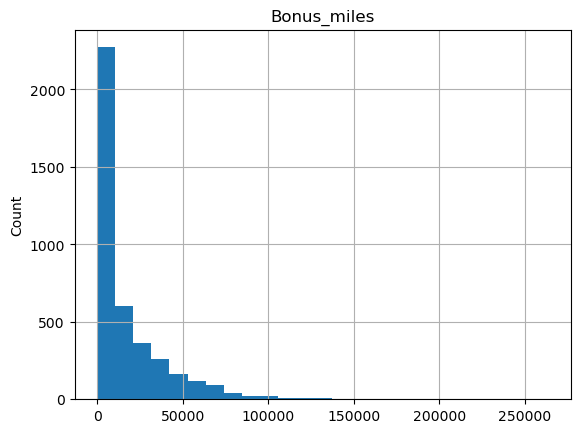

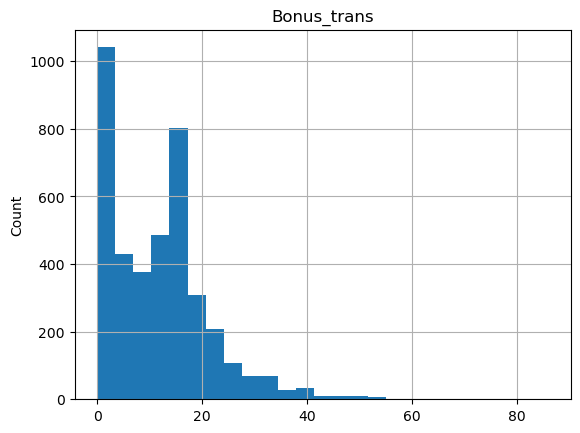

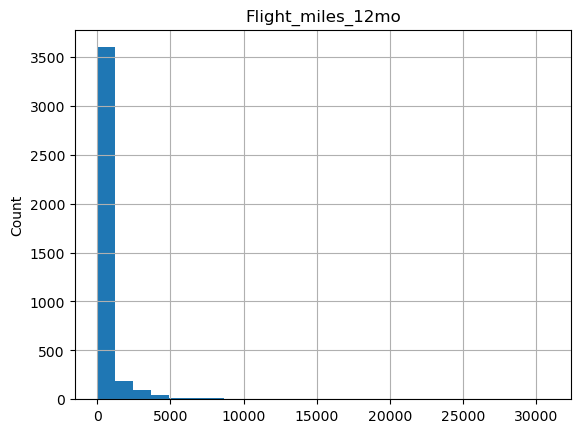

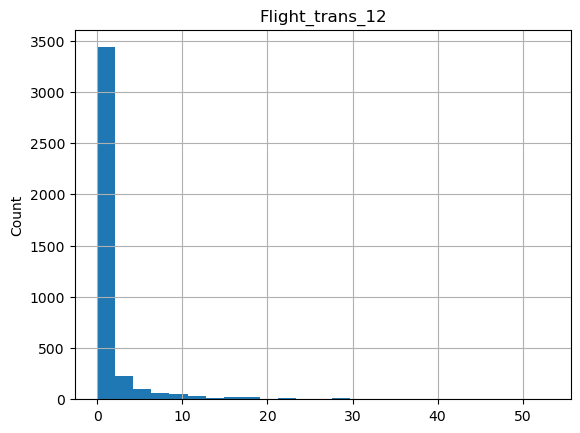

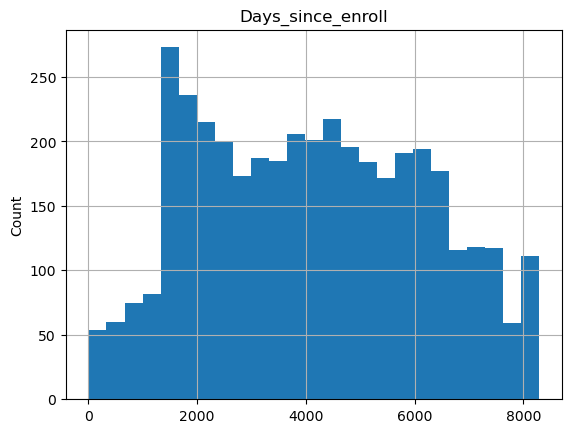

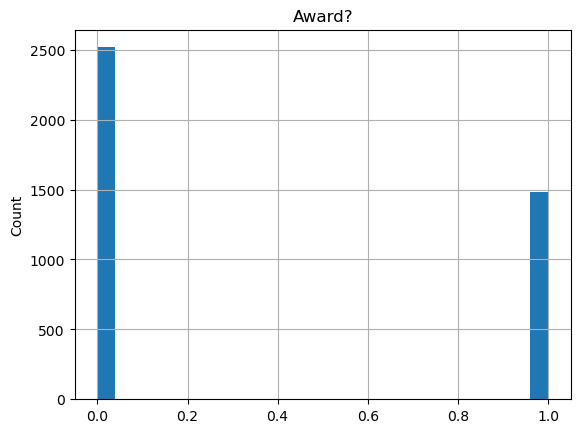

In [34]:
# 3.	Use multiple visualizations to understand the hidden patterns in the dataset
 ## Histogram 
    
import matplotlib.pyplot as plt
for i in df.columns:
    df[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

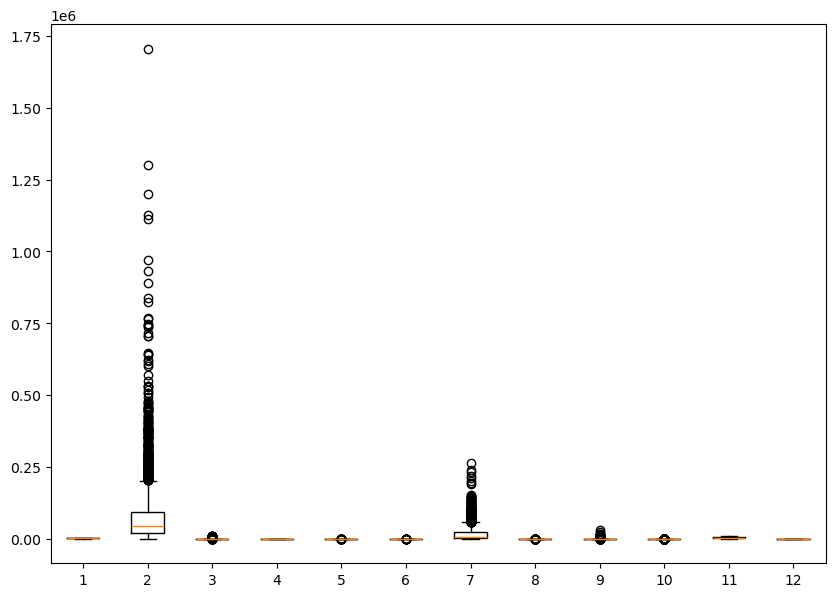

In [33]:
# box plot
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df)
plt.show()


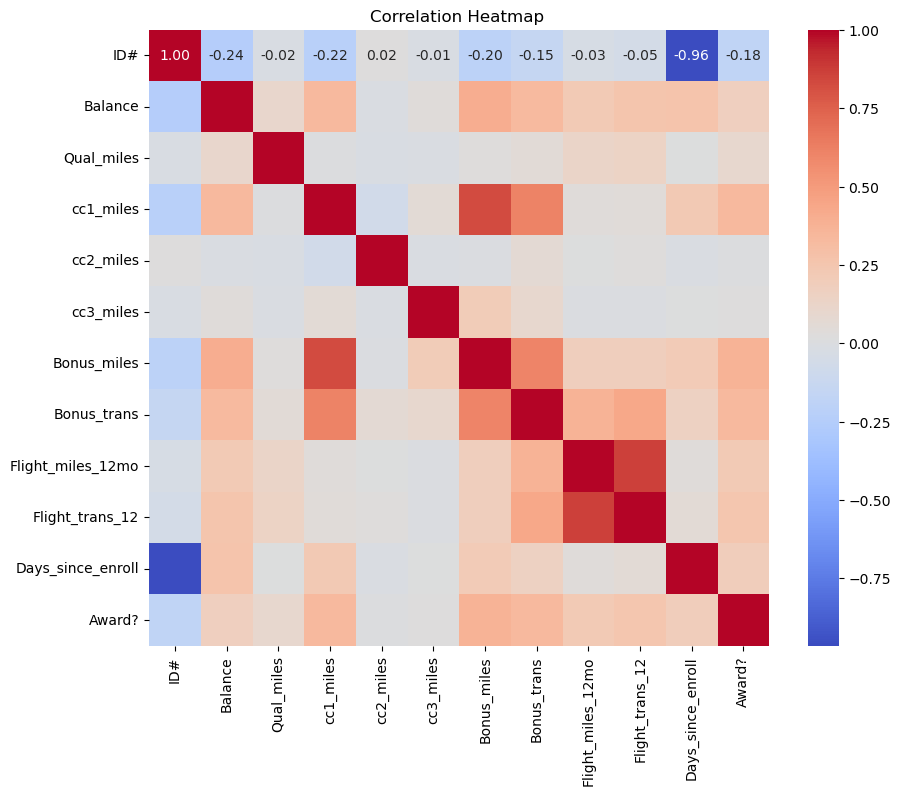

In [29]:
# Correlation heatmap for numerical variables
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap ')
plt.show() 


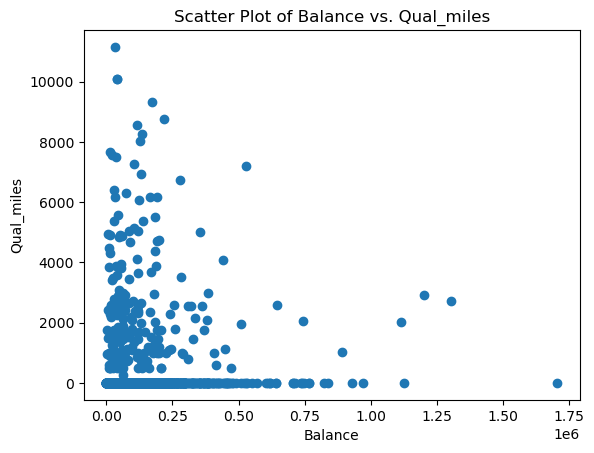

In [40]:
# Scatter plot
plt.figure()
plt.scatter(df['Balance'], df['Qual_miles'])
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Scatter Plot of Balance vs. Qual_miles')
plt.show()

# hierarchical Clustering

C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score for ward linkage: 0.49091505143321534


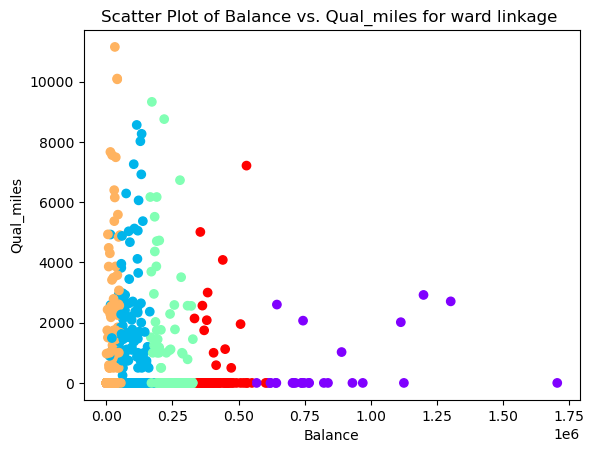

C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score for complete linkage: 0.7471643765929803


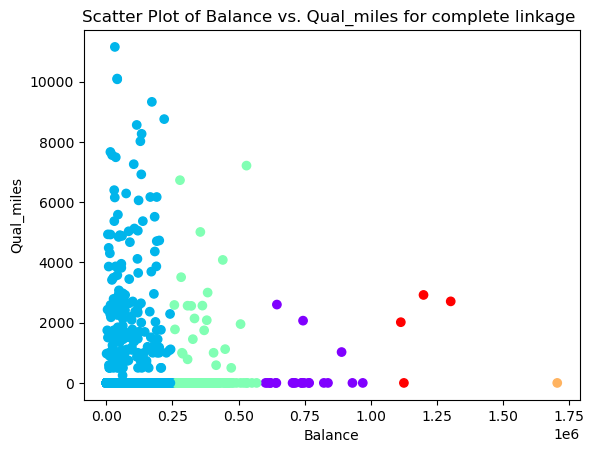

C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score for average linkage: 0.8359671672245398


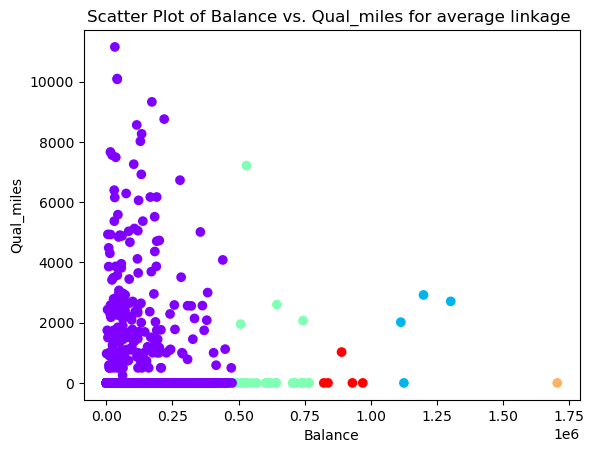

C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Silhouette score for single linkage: 0.8927034119906091


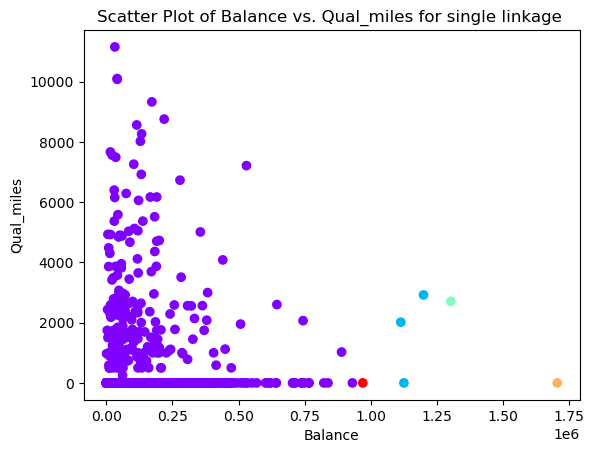

In [57]:
## Forming a group using clusters

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# create agglomerative clustering model with 4 linkages

linkages = ['ward', 'complete', 'average', 'single']
for i in linkages:
    cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage=i)
    Y = cluster.fit_predict(df)

    # Compute silhouette score
    
    silhouettescore = silhouette_score(df, Y)
    print(f'Silhouette score for {i} linkage: {silhouettescore}')
    # scatter plot to view clustering     
    plt.figure()
    plt.scatter(df['Balance'], df['Qual_miles'], c=cluster.labels_, cmap='rainbow')
    plt.xlabel('Balance')
    plt.ylabel('Qual_miles')
    plt.title(f'Scatter Plot of Balance vs. Qual_miles for {i} linkage ')
    plt.show()








# K-Means Clustering

C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gmani\anaconda3\Lib\site-packages\sklearn\clust

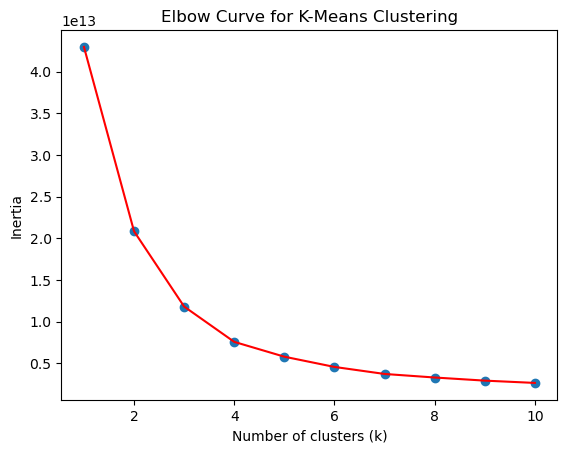

In [69]:
# K-means (Elbow curve for different K values) 

from sklearn.cluster import KMeans

# Calculate inertia for different values of k

inertias = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, random_state=0)
    Kmeans.fit(df)
    inertias.append(Kmeans.inertia_)

# Plot the elbow curve
plt.scatter(range(1, 11), inertias)
plt.plot(range(1, 11), inertias,color='red')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# DBSCAN clustering

Silhouette score for epsilon=0.5 and minPts=5: 0.5405178084689216


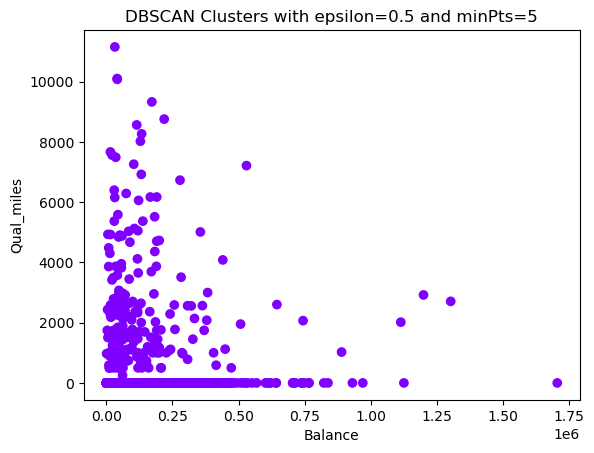

Silhouette score for epsilon=0.5 and minPts=10: 0.5405178084689216


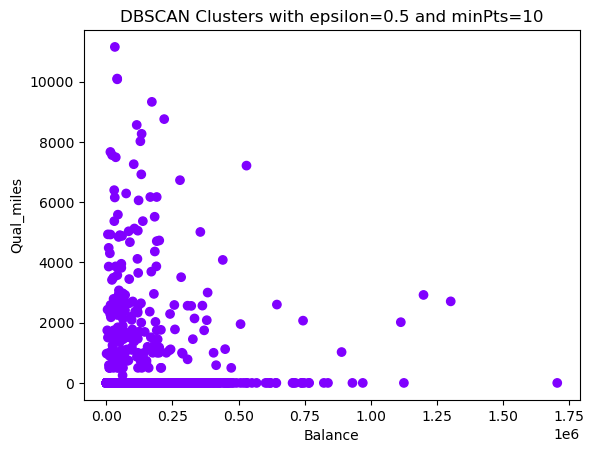

Silhouette score for epsilon=0.5 and minPts=15: 0.5405178084689216


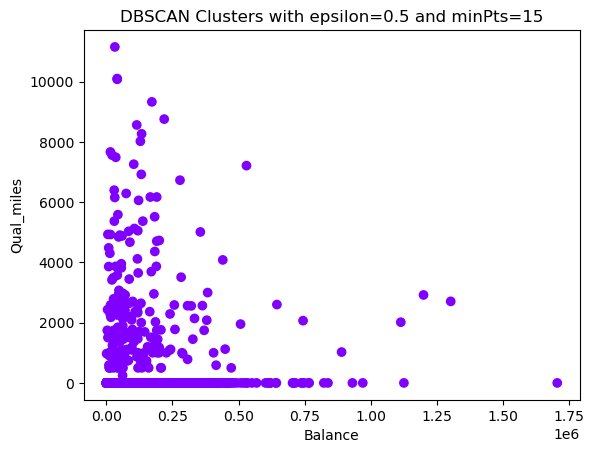

Silhouette score for epsilon=1.0 and minPts=5: 0.5405178084689216


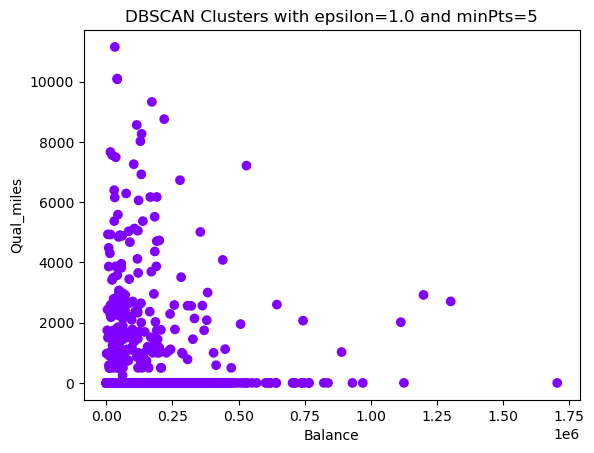

Silhouette score for epsilon=1.0 and minPts=10: 0.5405178084689216


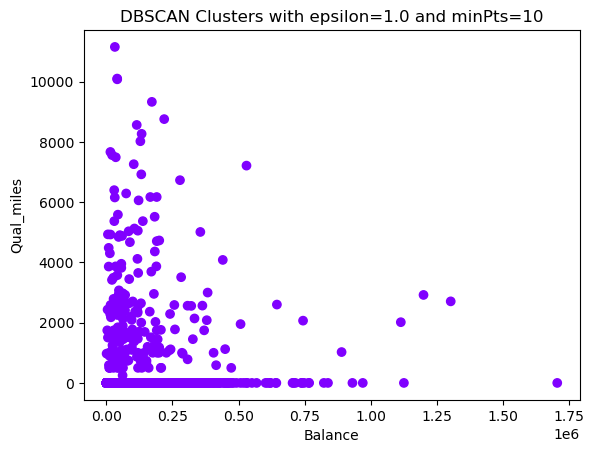

Silhouette score for epsilon=1.0 and minPts=15: 0.5405178084689216


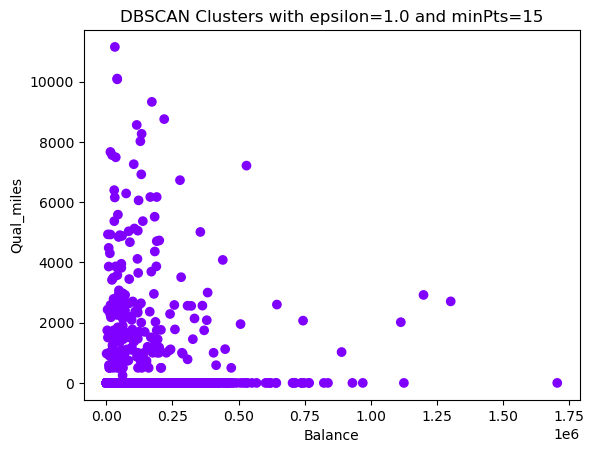

Silhouette score for epsilon=1.5 and minPts=5: 0.5405178084689216


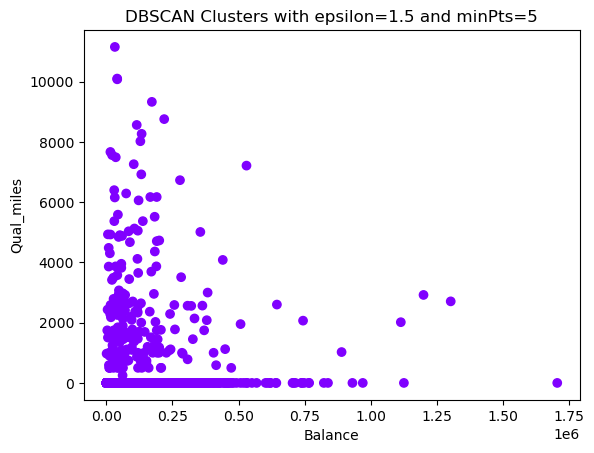

Silhouette score for epsilon=1.5 and minPts=10: 0.5405178084689216


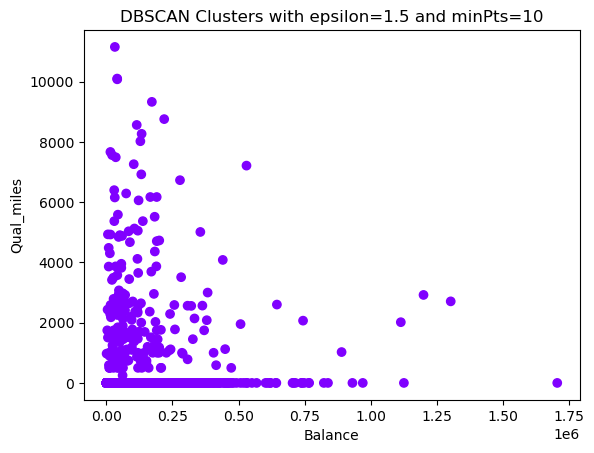

Silhouette score for epsilon=1.5 and minPts=15: 0.5405178084689216


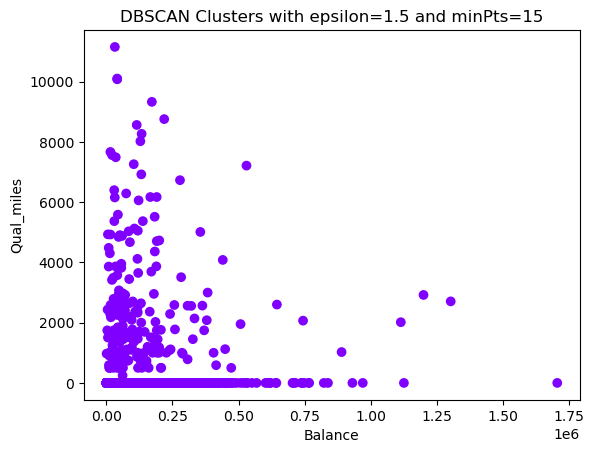

In [71]:
# Experiment with different epsilon and minPts values for DBSCAN clustering

from sklearn.cluster import DBSCAN

# Define different values of epsilon and minPts

epsilons = [0.5, 1.0, 1.5]
minPts = [5, 10, 15]

# Loop through different combinations of epsilon and minPts
for i in epsilons:
    for j in minPts:
        # Create a DBSCAN model with the current parameters
        dbscan = DBSCAN(eps=i, min_samples=j)

        # Fit the model to the data
        Y = dbscan.fit_predict(df)
        # Check if any clusters were assigned
        if len(set(Y)) > 1:

        # Calculate the silhouette score
          silhouettescore = silhouette_score(df, Y)

        # Print the results
        print(f'Silhouette score for epsilon={i} and minPts={j}: {silhouettescore}')

        # Plot the clusters
        plt.figure()
        plt.scatter(df['Balance'], df['Qual_miles'], c=Y, cmap='rainbow')
        plt.xlabel('Balance')
        plt.ylabel('Qual_miles')
        plt.title(f'DBSCAN Clusters with epsilon={i} and minPts={j}')
        plt.show()
